# $$Hotel Booking$$

$Problem Statement:$


In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.
The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

$Assumptions$
1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

$Research Question$
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

$Hypothesis$
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Analysing Part

$Import Libraries$

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
df= pd.read_csv("hotel_bookings 2.csv")

In [5]:
#check
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


$Exploratory Data Analysis and Data Cleaning$

In [4]:
df.tail(13)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119377,City Hotel,0,185,2017,August,35,30,1,4,2,...,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,4/9/2017
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,4/9/2017
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,4/9/2017
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,4/9/2017
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,5/9/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,5/9/2017
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,6/9/2017
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,6/9/2017
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#convert Object to date time format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], infer_datetime_format=True, format='%d/%m/%Y')

# yields_df['Date'] =pd.to_datetime(yields_df['Date'], infer_datetime_format=True)
# dates = df.DataFrame({'date': ['1/7/2020', '2/9/2020', '3/11/2020', '4/1/2020'], 'c1': [3,5,4,6]})
# dates['convert'] = pd.to_datetime(dates['date'])
# dates['convert']


# from datetime import datetime
# time_value = datetime.strptime(df['reservation_status_date'] + 'reservation_status_date', '%d/%m/%Y %H:%M:%S.%f')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [12]:
#Check Objectgs
df.describe( include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [13]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [14]:
#Ckeck Null 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
#Deleting Columns agent & company
df.drop(['agent','company'],axis=1,inplace=True)

In [16]:
#Delete only missing Value
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [19]:
#Indentify Outlier useing Describe function

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

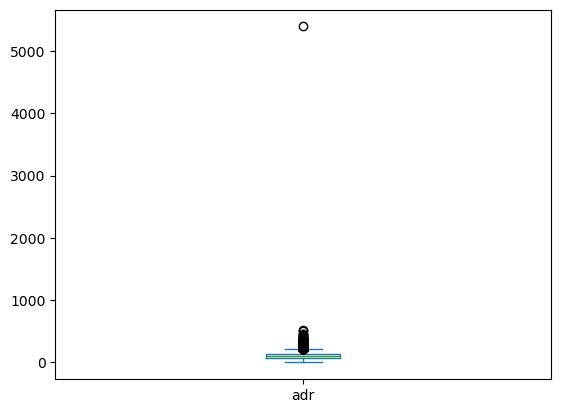

In [20]:
#check using box plot [adr]
df['adr'].plot(kind='box')

In [21]:
df= df[df['adr']<5000]

<Axes: >

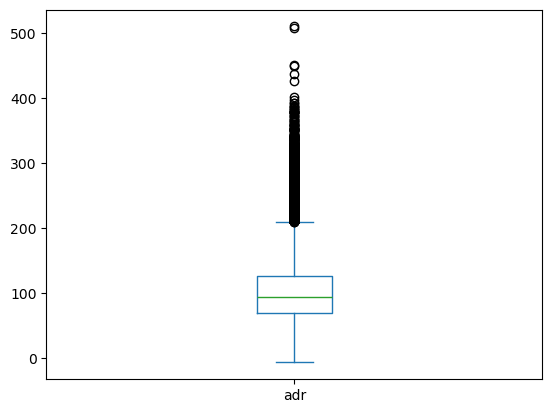

In [22]:
#check after Deletion
df['adr'].plot(kind='box')

<Axes: >

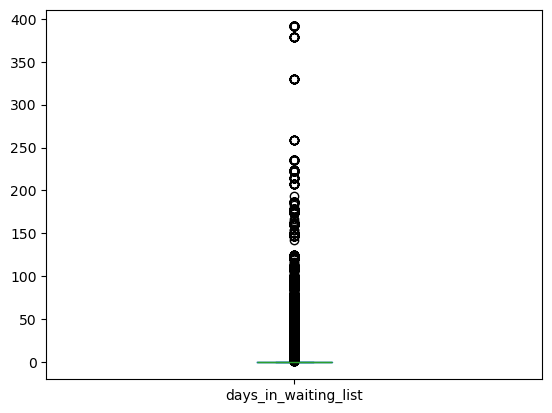

In [23]:
df['days_in_waiting_list'].plot(kind = 'box')

# Data Analysis & Visualization

In [24]:
#find cancelation rate
CancelationRate = df['is_canceled'].value_counts()
CancelationRate

is_canceled
0    74745
1    44152
Name: count, dtype: int64

In [25]:
#find cancelation rate percentage
CancelationPerc = df['is_canceled'].value_counts(normalize = True)
CancelationPerc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


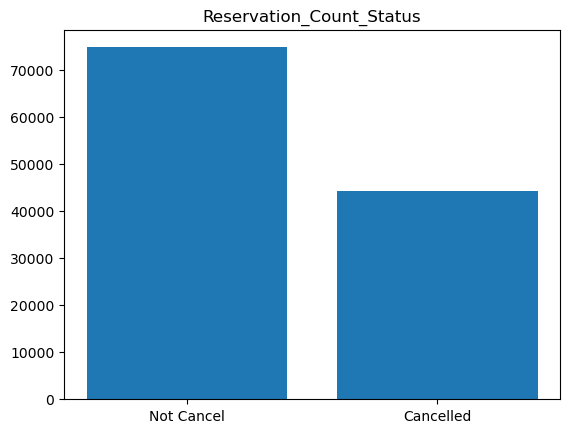

In [26]:
print(CancelationPerc)

# in Diagram
plt.title('Reservation_Count_Status')
plt.bar(['Not Cancel','Cancelled'],  df['is_canceled'].value_counts())
plt.show()

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


AttributeError: 'numpy.int64' object has no attribute 'startswith'

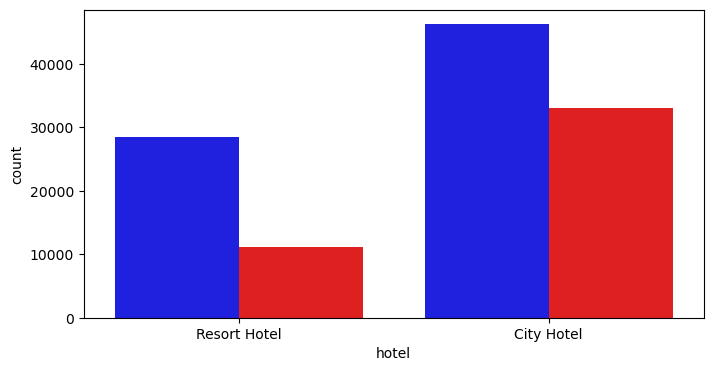

In [51]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x='hotel', hue= 'is_canceled', data= df, palette=('Blue','Red'))
legend_lables= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels', size =20)
plt.xlable('hotel')
plt.ylable('No. of Reservations')
plt.show()

In [52]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [53]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [55]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

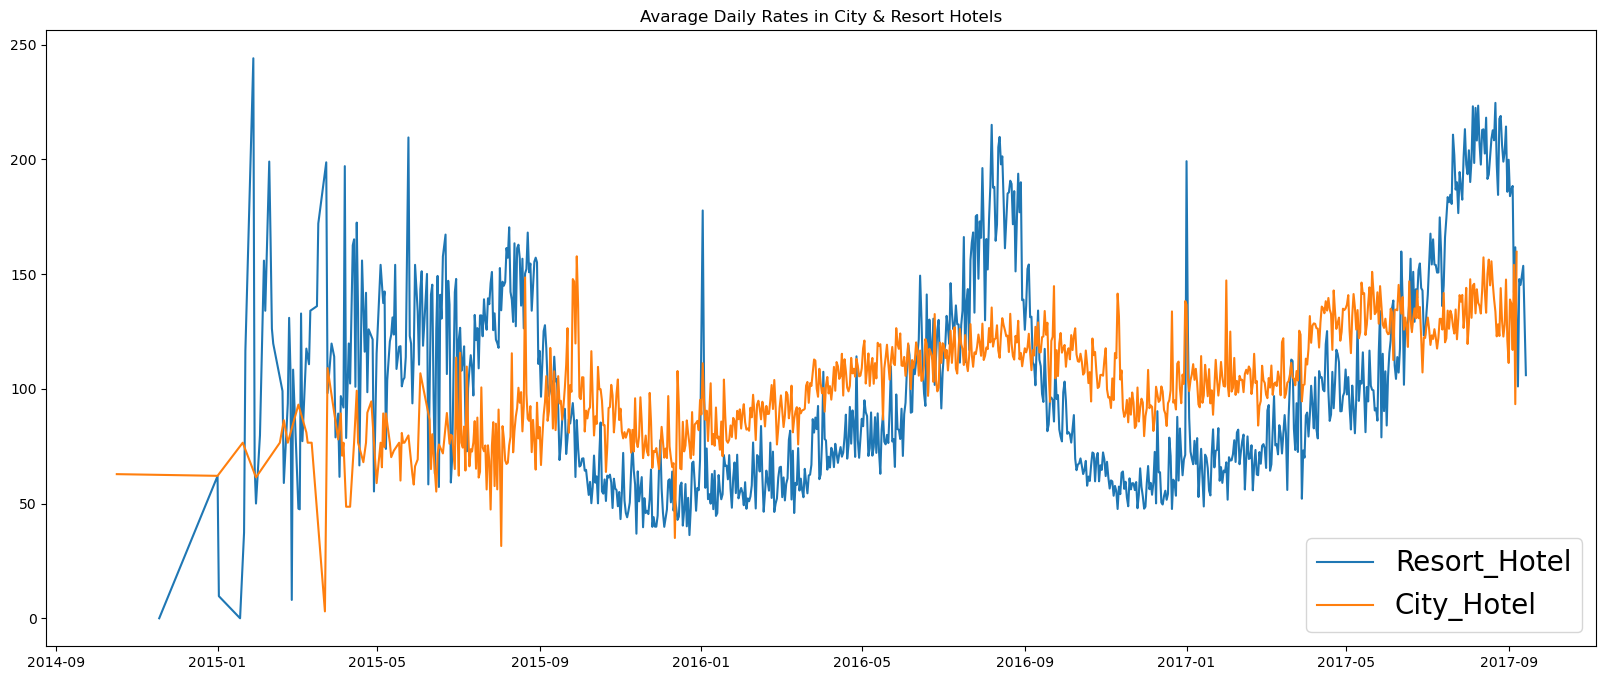

In [62]:
plt.figure(figsize=(20,8)) 
plt.title('Avarage Daily Rates in City & Resort Hotels')
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort_Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City_Hotel')
plt.legend(fontsize =20)
plt.show()

In [65]:
df['month']= df['reservation_status_date'].dt.month
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


AttributeError: 'numpy.int64' object has no attribute 'startswith'

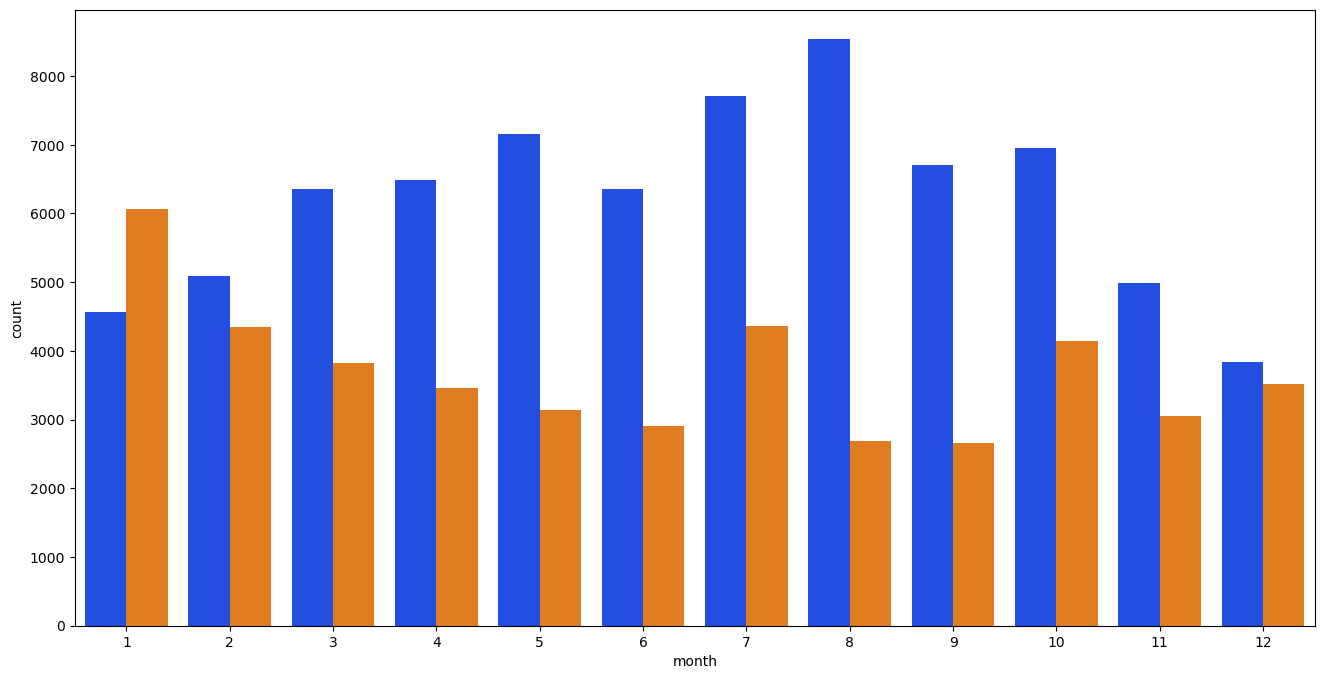

In [68]:
plt.figure(figsize =(16,8))
ax2 = sns.countplot(x='month', hue='is_canceled',data=df, palette = 'bright')
legend_label,_=ax2.get_legend_handles_labels()
ax2.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per Months')
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.legend('Not Canceled', 'Canceled')
plt.show()
           

In [95]:
Canceled_data= df[df['is_canceled'] == 1]

TypeError: barplot() got multiple values for argument 'data'

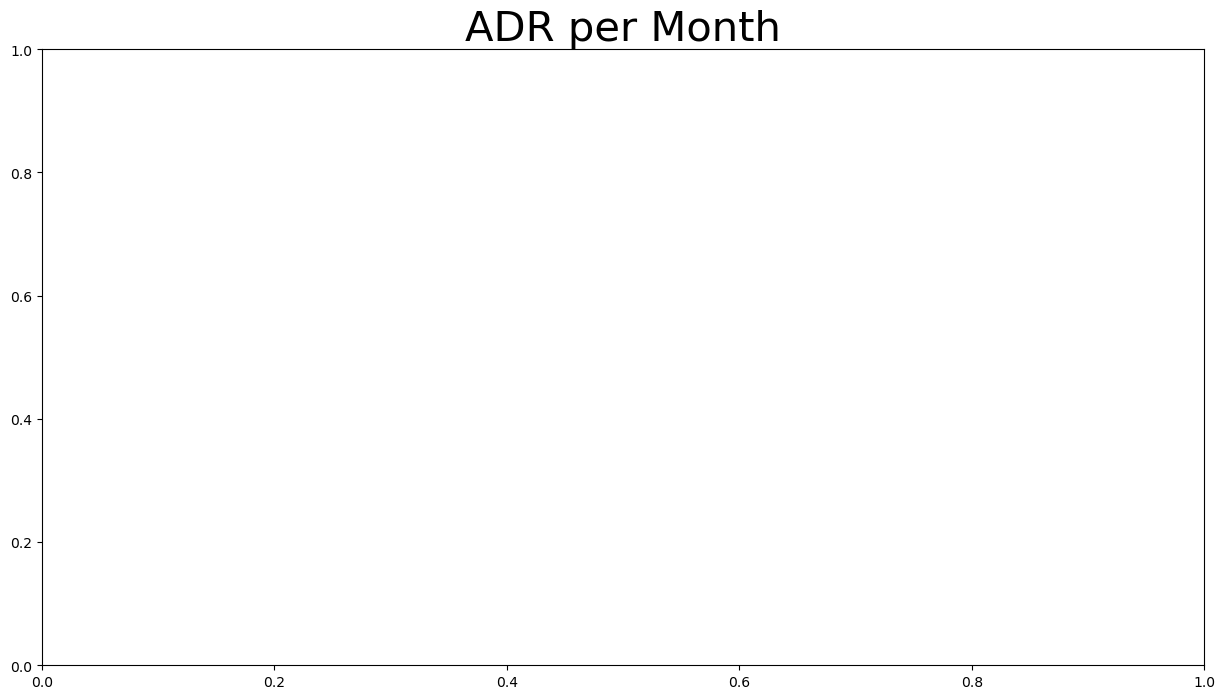

In [83]:
plt.figure(figsize=(15,8))
plt.title('ADR per Month', fontsize =30)
sns.barplot('month','adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

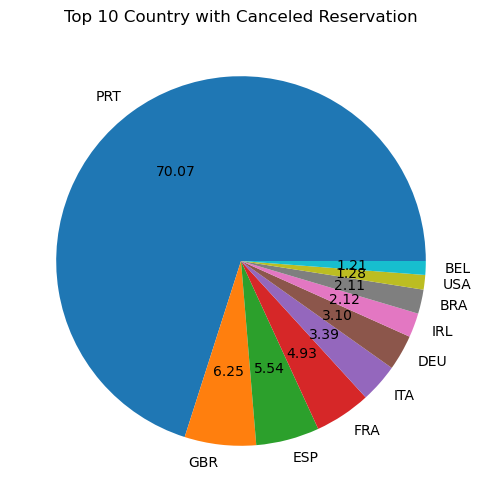

In [87]:
Top10_Country = Canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(6,6))
plt.title('Top 10 Country with Canceled Reservation')
plt.pie(Top10_Country, autopct ='%.2f', labels= Top10_Country.index)
plt.show()


In [89]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [90]:
df['market_segment'].value_counts(normalize =True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [91]:
Canceled_data['market_segment'].value_counts(normalize =True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

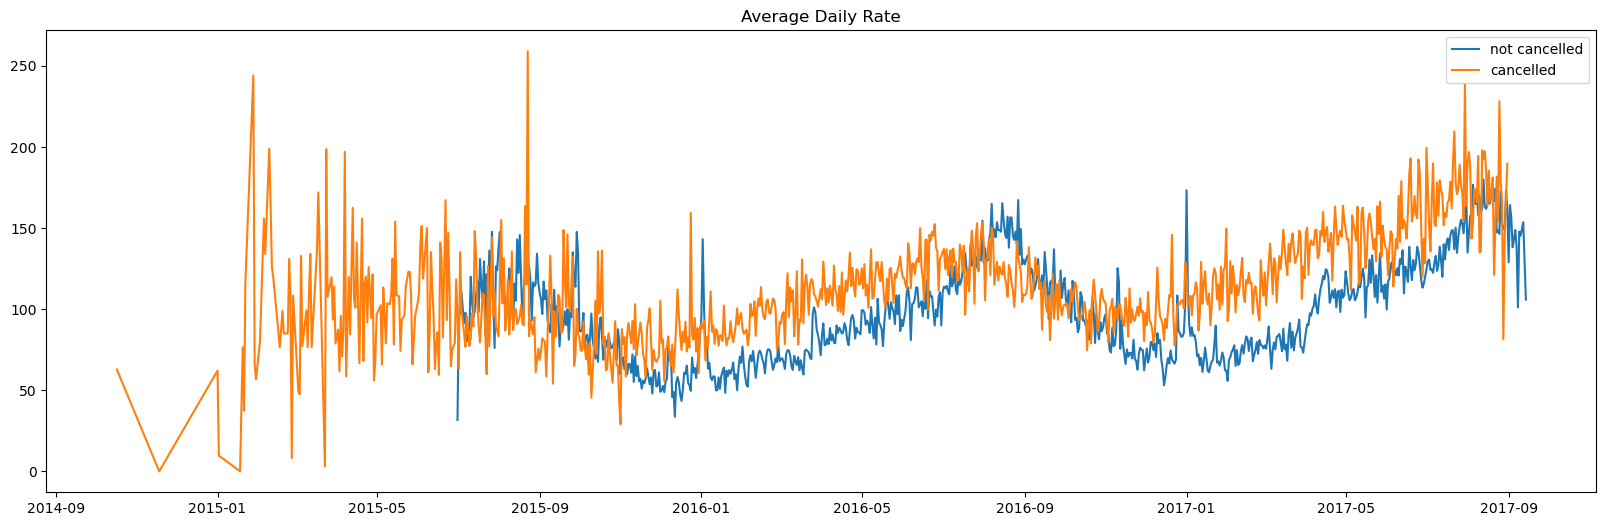

In [97]:
cancelled_df_adr= Canceled_data.groupby ('reservation_status_date') [['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace= True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date') [['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace =True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate') 
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label ='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label ='cancelled')
plt.legend()